# <span id="0">Casus *Hidden Markov Model* - Deel III</span>

Inhoud:

* **<a href="#1">Het Viterbi algoritme</a>**

* **<a href="#2">Het decoding probleem</a>**

* **<a href="#3">Rekenvoorbeeld</a>**

* **<a href="#4">Je eigen `HiddenMarkovModel` class</a>**

* **<a href="#5">CpG-eilandjes</a>**

In [1]:
%matplotlib inline
%reload_ext autoreload
%autoreload 2

from matplotlib import pyplot as plt
import numpy as np

<a id="1" href="#0" style="text-align: right; display: block;">Terug naar boven</a>

### Het Viterbi algoritme

Het Viterbi-algoritme is een [dynamisch](https://en.wikipedia.org/wiki/Dynamic_programming) programmeeralgoritme voor het verkrijgen van de meest waarschijnlijke reeks verborgen toestanden die resulteert in een reeks waargenomen gebeurtenissen. Dit gebeurt vooral in de context van Hidden Markov modellen, maar er zijn ook andere toepassingen.

Bekijk onderstaande inleidende video waarin het algoritme wordt gebruikt om de kortste route tussen twee bestemmingen te bepalen. Het voordeel van het Viterby-algoritme is dat je niet alle mogelijke routes hoeft op te sommen; tijdens de toepassing van het algoritme vallen vele mogelijk routes die niet optimaal kunnen zijn vanzelf al af, en deze hoef je daardoor niet helemaal door te rekenen.

In [2]:
%%html
<iframe width="560" height="315" src="https://www.youtube.com/embed/6JVqutwtzmo" title="YouTube video player" frameborder="0" allow="accelerometer; autoplay; clipboard-write; encrypted-media; gyroscope; picture-in-picture; web-share" referrerpolicy="strict-origin-when-cross-origin" allowfullscreen></iframe>

In het onderstaande kaartje staan afstanden (in km) aangegeven om in zes (verschillend gekleurde) stappen van Groningen naar zuid-Nederland te reizen. Gebruik het Viterbi-algoritme om de kortste afstand vanuit Groningen naar elke stad in dit kaartje te bepalen, vergelijkbaar met wat er in de video gedaan wordt. Geef als eindresultaat de afstanden van Groningen tot Middelburg, Breda, Tilburg, Eindhoven en Maastricht, plus de paden die je volgt om vanuit Groningen optimaal in die steden terecht te komen.

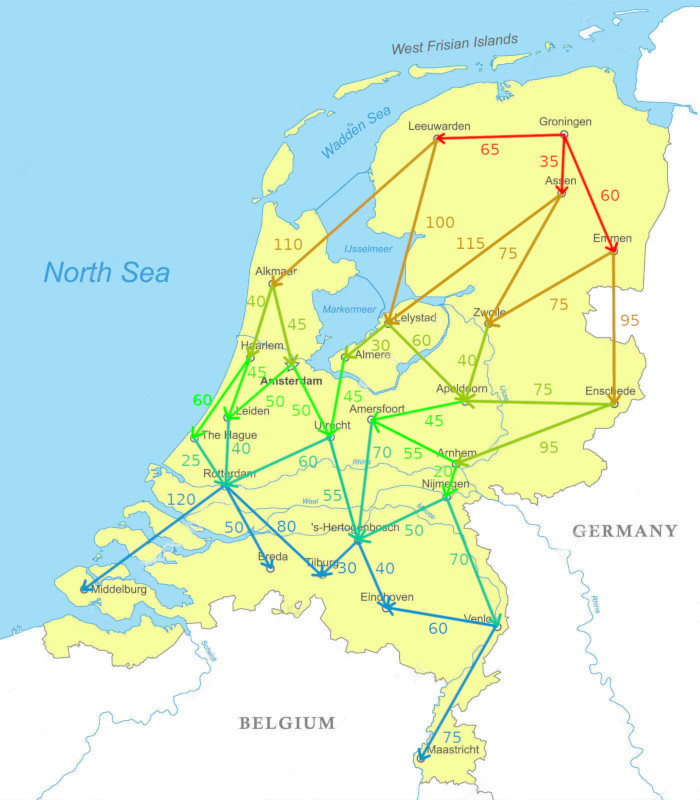

[Image credit](https://depositphotos.com/nl/vector/political-map-netherlands-national-borders-cities-rivers-646536752.html)

In [3]:
# UITWERKING

<a id="2" href="#0" style="text-align: right; display: block;">Terug naar boven</a>

### Het decoding probleem

In een vorige les heb je een reeks knikkers getrokken aan drie verschillende tafels. De gegevens omtrent overgangswaarschijnlijkheden en emissiekansen kun je aflezen uit de inmiddels bekende gegevens omtrent de opzet van het experiment:

| Tafel: |  ❶  |  ❷  |  ❸  |
| -----: | :-: | :-: | :-: |
| **Grabbelton:** | 6x blauw | 2x blauw | 1x blauw |
|                 | 3x geel  | 6x geel  | 0x geel  | 
|                 | 1x groen | 2x groen | 6x groen |
|                 | 2x rood  | 2x rood  | 5x rood  |
| **Dobbelsteen:** | ⚀→① | ⚀→① | ⚀→① |
|                  | ⚁→② | ⚁→② | ⚁→① |
|                  | ⚂→② | ⚂→② | ⚂→① |
|                  | ⚃→② | ⚃→③ | ⚃→① |
|                  | ⚄→③ | ⚄→③ | ⚄→② |
|                  | ⚅→③ | ⚅→③ | ⚅→③ |

In de praktijk van Hidden Markov Models hebben we waarnemingen (kleuren knikkers) maar kennen we niet de toestanden (de tafels). Laten we eens proberen te berekenen wat de *meest waarschijnlijke* reeks tafels is die ten grondslag ligt aan de volgende reeks gekleurde knikkers:

| **Beurt:** | 1     | 2     | 3     | 4     | 5     |
| ---------: | :---: | :---: | :---: | :---: | :---: |
| **Kleur:** | geel  | groen | blauw | rood  | groen |

We noemen dit het *decoding-probleem*. kunnen het Viterby-algoritme gebruiken. In dit geval *minimaliseren* we niet de totale *afstand* tussen steden, maar *maximaliseren* we de *kans* op emissies en toestanden. In plaats van bij te houden via welke *steden* je zou moeten reizen houden we bij via welke *toestanden* de uitkomsten het meest waarschijnlijk zijn.

Het Viterbi-algoritme begint met alleen het begin van de reeks te beschouwen: eerst kijken we alleen naar beurt 1.

##### Beurt 1

In beurt 1 werd een gele knikker getrokken. Er zijn drie manieren hoe dit zou kunnen geschieden:

* Vanuit tafel ❶:<br />de kans dat je begint aan tafel ❶ is $\frac{1}{3}$, en de kans dat je daar een gele knikker trekt is $\frac{3}{12} = \frac{1}{4}$, dus de kans dat je via tafel ❶ een gele knikker trekt is

$$
P(❶_1 \cap \text{geel}_1) = \frac{1}{3} \cdot \frac{1}{4} = \frac{1}{12}
$$

* Vanuit tafel ❷:<br />de kans dat je begint aan tafel ❷ is $\frac{1}{3}$, en de kans dat je daar een gele knikker trekt is $\frac{6}{12} = \frac{1}{2}$, dus de kans dat je via tafel ❷ een gele knikker trekt is

$$
P(❷_1 \cap \text{geel}_1) = \frac{1}{3} \cdot \frac{1}{2} = \frac{1}{6}
$$

* Vanuit tafel ❸:<br />de kans dat je begint aan tafel ❸ is $\frac{1}{3}$, en de kans dat je daar een gele knikker trekt is $\frac{0}{12} = 0$, dus de kans dat je via tafel ❸ een gele knikker trekt is

$$
P(❸_1 \cap \text{geel}_1) = \frac{1}{3} \cdot 0 = 0
$$

We kunnen dit samenvatten in een tabel:

| **Beurt:** | 1     |
| ---------: | :---: |
|            | p = $\frac{1}{12}$ via $❶_1$ |
|            | p = $\frac{1}{6}$ via $❷_1$ |
|            | p = $0$ via $❸_1$ |

Het meest waarschijnlijk, tot dusverre, is dat de toestand behorende bij beurt 1 overeenkomt met tafel ❷, want dat heeft de hoogste kans.

##### Beurt 2

In beurt 2 werd een groene knikker getrokken. Er zijn drie manieren hoe dit zou kunnen geschieden:

* Vanuit tafel ❶:<br />Je kan op drie manieren aan tafel ❶ terechtkomen in beurt 2:
  * als je aan tafel ❶ zat in beurt 1.
    * de kans in beurt 1 met een gele waarneming op tafel ❶ was $\frac{1}{12}$ (zie de vorige stap);
    * de kans dat je vanaf tafel ❶ met een dobbelsteenworp naar tafel ❶ gaat is $\frac{1}{6}$;
    * de kans dat je vanuit tafel ❶ een groene knikker trekt is $\frac{1}{12}$
    <br />Dus de gecombineerde kans dat je vanaf tafel ❶ in beurt 1 naar tafel ❶ in beurt 2 een groene knikker trekt is $\frac{1}{12} \cdot \frac{1}{6} \cdot \frac{1}{12} = \frac{1}{864} \approx 0.00116$
  * als je aan tafel ❷ zat in beurt 1.
    * de kans in beurt 1 met een gele waarneming op tafel ❷ was $\frac{1}{6}$ (zie de vorige stap);
    * de kans dat je vanaf tafel ❷ met een dobbelsteenworp naar tafel ❶ gaat is $\frac{1}{6}$;
    * de kans dat je vanuit tafel ❶ een groene knikker trekt is $\frac{1}{12}$
    <br />Dus de gecombineerde kans dat je vanaf tafel ❷ in beurt 1 naar tafel ❶ in beurt 2 een groene knikker trekt is $\frac{1}{6} \cdot \frac{1}{6} \cdot \frac{1}{12} = \frac{1}{432} \approx 0.00231$
  * als je aan tafel ❸ zat in beurt 1.
    * de kans in beurt 1 met een gele waarneming op tafel ❸ was $0$ (zie de vorige stap);
    * de kans dat je vanaf tafel ❸ met een dobbelsteenworp naar tafel ❶ gaat is $\frac{4}{6}$;
    * de kans dat je vanuit tafel ❶ een groene knikker trekt is $\frac{1}{12}$
    <br />Dus de gecombineerde kans dat je vanaf tafel ❷ in beurt 1 naar tafel ❶ in beurt 2 een groene knikker trekt is $0 \cdot \frac{4}{6} \cdot \frac{1}{12} = 0 = 0.00000$

De *meest waarschijnlijke*  manier om in beurt 2 aan tafel ❶ te komen is dus via tafel ❷ in beurt 1, met kans

$$
P(❷_1 \cap \text{geel}_1 \cap ❶_2 \cap \text{groen}_2) = 0.00231
$$

* Vanuit tafel ❷:<br />Je kan op drie manieren aan tafel ❷ terechtkomen in beurt 2:
  * als je aan tafel ❶ zat in beurt 1.
    * de kans in beurt 1 met een gele waarneming op tafel ❶ was $\frac{1}{12}$ (zie de vorige stap);
    * de kans dat je vanaf tafel ❶ met een dobbelsteenworp naar tafel ❷ gaat is $\frac{3}{6}$;
    * de kans dat je vanuit tafel ❷ een groene knikker trekt is $\frac{2}{12}$
    <br />Dus de gecombineerde kans dat je vanaf tafel ❶ in beurt 1 naar tafel ❶ in beurt 2 een groene knikker trekt is $\frac{1}{12} \cdot \frac{3}{6} \cdot \frac{2}{12} = \frac{1}{144} \approx 0.00694$
  * als je aan tafel ❷ zat in beurt 1.
    * de kans in beurt 1 met een gele waarneming op tafel ❷ was $\frac{1}{6}$ (zie de vorige stap);
    * de kans dat je vanaf tafel ❷ met een dobbelsteenworp naar tafel ❷ gaat is $\frac{2}{6}$;
    * de kans dat je vanuit tafel ❷ een groene knikker trekt is $\frac{2}{12}$
    <br />Dus de gecombineerde kans dat je vanaf tafel ❷ in beurt 1 naar tafel ❶ in beurt 2 een groene knikker trekt is $\frac{1}{6} \cdot \frac{2}{6} \cdot \frac{2}{12} = \frac{1}{108} \approx 0.00926$
  * als je aan tafel ❸ zat in beurt 1.
    * de kans in beurt 1 met een gele waarneming op tafel ❸ was $0$ (zie de vorige stap);
    * de kans dat je vanaf tafel ❸ met een dobbelsteenworp naar tafel ❷ gaat is $\frac{1}{6}$;
    * de kans dat je vanuit tafel ❷ een groene knikker trekt is $\frac{2}{12}$
    <br />Dus de gecombineerde kans dat je vanaf tafel ❸ in beurt 1 naar tafel ❶ in beurt 2 een groene knikker trekt is $0 \cdot \frac{1}{6} \cdot \frac{2}{12} = 0 = 0.00000$

De *meest waarschijnlijke*  manier om in beurt 2 aan tafel ❷ te komen is dus via tafel ❷ in beurt 1, met kans

$$
P(❷_1 \cap \text{geel}_1 \cap ❷_2 \cap \text{groen}_2) = 0.00926
$$

* Vanuit tafel ❸:<br />Je kan op drie manieren aan tafel ❸ terechtkomen in beurt 2:
  * als je aan tafel ❶ zat in beurt 1.
    * de kans in beurt 1 met een gele waarneming op tafel ❶ was $\frac{1}{12}$ (zie de vorige stap);
    * de kans dat je vanaf tafel ❶ met een dobbelsteenworp naar tafel ❸ gaat is $\frac{2}{6}$;
    * de kans dat je vanuit tafel ❸ een groene knikker trekt is $\frac{6}{12}$
    <br />Dus de gecombineerde kans dat je vanaf tafel ❶ in beurt 1 naar tafel ❸ in beurt 2 een groene knikker trekt is $\frac{1}{12} \cdot \frac{2}{6} \cdot \frac{6}{12} = \frac{1}{72} \approx 0.01389$
  * als je aan tafel ❷ zat in beurt 1.
    * de kans in beurt 1 met een gele waarneming op tafel ❷ was $\frac{1}{6}$ (zie de vorige stap);
    * de kans dat je vanaf tafel ❷ met een dobbelsteenworp naar tafel ❸ gaat is $\frac{3}{6}$;
    * de kans dat je vanuit tafel ❸ een groene knikker trekt is $\frac{6}{12}$
    <br />Dus de gecombineerde kans dat je vanaf tafel ❷ in beurt 1 naar tafel ❸ in beurt 2 een groene knikker trekt is $\frac{1}{6} \cdot \frac{3}{6} \cdot \frac{6}{12} = \frac{1}{24} \approx 0.04167$
  * als je aan tafel ❸ zat in beurt 1.
    * de kans in beurt 1 met een gele waarneming op tafel ❸ was $0$ (zie de vorige stap);
    * de kans dat je vanaf tafel ❸ met een dobbelsteenworp naar tafel ❸ gaat is $\frac{1}{6}$;
    * de kans dat je vanuit tafel ❸ een groene knikker trekt is $\frac{6}{12}$
    <br />Dus de gecombineerde kans dat je vanaf tafel ❸ in beurt 1 naar tafel ❸ in beurt 2 een groene knikker trekt is $0 \cdot \frac{1}{6} \cdot \frac{6}{12} = 0 = 0.00000$

De *meest waarschijnlijke*  manier om in beurt 2 aan tafel ❸ te komen is dus via tafel ❷ in beurt 1, met kans

$$
P(❷_1 \cap \text{geel}_1 \cap ❸_2 \cap \text{groen}_2) = 0.04167
$$

Als we nu alles tezamen bekijken, is de meest waarschijnlijke toestand in beurt 2 tafel ❸ geweest, volgend op tafel ❷ in beurt 1. Dat gaf immers een kans van 0.04167, wat hoger is dan beide andere.

We breiden hiermee de tabel uit:

| **Beurt:** | 1     | 2     |
| ---------: | :---: | :---: |
|            | p = $\frac{1}{12}$ via ❶ | p = 0.00231 via ❷-❶ |
|            | p = $\frac{1}{6}$ via ❷ | p = 0.00926 via ❷-❷ |
|            | p = $0$ via ❸ | p = 0.04167 via ❷-❸ |

##### Enzovoorts

We voeren steeds hetzelfde recept uit. Voor elke mogelijke tafel in de huidige beurt, beschouw elke mogelijke tafel uit de vorige beurt. Vermenigvuldig de kans die je uit die vorige beurt voor die tafel berekend had met de kans om van de vorige naar de huidige tafel over te gaan, en met de kans om dan de huidige kleur knikker te trekken. De meeste waarschijnlijke mogelijkheid "wint".

Ga na dat je de volgende resultaten krijgt:

| **Beurt:** | 1     | 2     | 3     | 4     | 5     |
| ---------: | :---: | :---: | :---: | :---: | :---: |
|            | p = $\frac{1}{12}$ via ❶ | p = 0.00231 via ❷-❶ | p = 0.01389 via ❷-❸-❶ | p = 0.00039 via ❷-❸-❶-❶ | p = 0.00011 via ❷-❸-❶-❸-❶ |
|            | p = $\frac{1}{6}$ via ❷ | p = 0.00926 via ❷-❷ | p = 0.00116 via ❷-❸-❷ | p = 0.00116 via ❷-❸-❶-❶ | p = 0.00006 via ❷-❸-❶-❷-❷ |
|            | p = $0$ via ❸ | p = 0.04167 via ❷-❸ | p = 0.00058 via ❷-❸-❸ | p = 0.00193 via ❷-❸-❶-❶ | p = 0.00029 via ❷-❸-❶-❷-❸ |

De eindconclusie lezen we nu af in de laatste kolom: de emissies geel-groen-blauw-rood-groen zijn het meest waarschijnlijk gekomen vanuit toestanden ❷-❸-❶-❷-❸!

Merk op dat er iets bijzonders kan gebeuren: in beurt vier was de meest waarschijnlijke reeks toestanden ❷-❸-❶-❶ (met een kans 0.00193), en leek het er dus op dat je in beurt vier aan tafel ❶ zat. Echter, uiteindelijk bleek de meest waarschijnlijke reeks ❷-❸-❶-❷-❸ (met kans 0.00029), en zat je in beurt vier dus aan tafel ❷. Dat wil zeggen, latere informatie heeft invloed op de beste oplossing voor eerdere beurten.

Bepaal nu voor de eerste vijf beurten uit jouw eigen experimentele waarnemingen wat de meest waarschijnlijke bijbehorende serie tafels is. Is dit dezelfde reeks als de tafels die je daadwerkelijk bezocht hebt?

In [4]:
# UITWERKING

<a id="3" href="#0" style="text-align: right; display: block;">Terug naar boven</a>

### Rekenvoorbeeld

De onderstaande video behandelt het decoding-probleem voor een Hidden Markov Model met twee toestanden: warm of koud weer; en drie mogelijke emissies: één, twee of drie gegeten ijsjes. (Dit voorbeeld wordt desgewenst [hier](https://www.youtube.com/watch?v=xejm-z3sbWA) nader toegelicht.) In onderstaande video wordt uitgewerkt hoe je kan nagaan wat de meest waarschijnlijke serie warme of koude dagen is geweest, gegeven dat je een aantal dagen observeert hoeveel ijsjes er gegeten worden.

Bekijk de video en ga na dat je begrijpt hoe het Viterbi-algoritme in dit geval wordt toegepast om het decoding-probleem op te lossen. Als je het algoritme reeds goed denkt te begrijpen, bekijk dan de video vluchtig; als je het een ingewikkeld algoritme vind, probeer dan daadwerkelijk elke rekenstap zelf na te doen. Als je zaken opmerkt die je noemenswaardig vindt om te onthouden, noteer die dan.

Opmerking: de audio-kwaliteit en verstaanbaarheid van deze video is niet optimaal; het voorbeeld zelf is echter zeer illustratief en geschikt om door te nemen.

In [5]:
%%html
<iframe width="560" height="315" src="https://www.youtube.com/embed/xejm-z3sbWA" title="YouTube video player" frameborder="0" allow="accelerometer; autoplay; clipboard-write; encrypted-media; gyroscope; picture-in-picture; web-share" referrerpolicy="strict-origin-when-cross-origin" allowfullscreen></iframe>

In [4]:
# UITWERKING

<a id="4" href="#0" style="text-align: right; display: block;">Terug naar boven</a>

### Je eigen `HiddenMarkovModel` class

Voeg nu een `predict()` methode toe aan je eigen `HiddenMarkovModel` klasse. Deze ontvangt slechts één argument: een iterable met emissies (hier de reeks kleuren; bv. `X`). De methode dient op grond van de bekende begintoestandverdeling, emissiekansen, en overgangswaarschijnlijkheden te bepalen wat de meest waarschijnlijke reeks toestanden is die overeenkomst met de gegeven emissies. Als retourwaarde wordt een iterable teruggeven aan de gebruiker met toestanden (hier de reeks tafels; `state_sequence`). Zie de [documentatie](https://hmmlearn.readthedocs.io/en/latest/api.html#hmmlearn.hmm.CategoricalHMM.predict) van `hmmlearn` voor een voorbeeld van een soortgelijke API.

Opnieuw geldt dat er een probleem kan ontstaan als je vele opeenvolgende waarnemingen moet doorrekenen: de kansen worden geleidelijk aan steeds kleiner, en kunnen op den duur mogelijk niet meer door een floating-point waarde gerepresenteerd worden omdat ze afgerond worden naar nul. Bij het decoding-probleem gaat het er slechts om om de toestanden met de hoogste kans te achterhalen; het berekenen van die kans deden we in het vorige deel. Daarom kun je dit numerieke afrond-probleem oplossen door alle kansen samen te schalen. Ter illustratie, in beurt 5 vonden we hierboven kansen p = 0.00011, 0.00006, en 0.00029; je zou dit kunnen opschalen naar bijvoorbeeld p = 0.11, 0.06, en 0.29. De optimale reeks toestanden verandert daardoor niet.

Gebruik je eigen module om de berekening uit de voorgaande oefening voor je eerste vijf waarnemingen te controleren. Komt er hetzelfde antwoord uit? Bepaal ook de meest waarschijnlijke reeks tafels voor jouw hele eigen reeks waarnemingen. Hoeveel procent van de toestanden wordt goed voorspeld? Is dit meer dan een fractie $\frac{1}{3}$ die je op grond van toeval zou verwachten?

Gebruik de `score()` functie van je eigen module om de log-waarschijnlijkheid op de waargenomen kleuren te bepalen: vergelijk de waarschijnlijkheid op basis van de zojuist bepaalde meest waarschijnlijke reeks tafels met die op basis van de daadwerkelijke reeks tafels die je bezocht hebt. Verifieer dat de kans met de meest waarschijnlijke reeks inderdaad de hoogste is. Het kan dus zo zijn dat een andere reeks toestanden dan die welke tot de emissies leidden beter overeenkomen met de emissies!

Doe hetzelfde met de waarnemingen van de klas als geheel. Hoeveel procent van de toestanden kan je Hidden Markov Model juist voorspellen? Komt dit antwoord overeen met wat `CategoricalHMM(...).predict(X)` uit de `hmmlearn` module rapporteert?

In [7]:
# UITWERKING

============================= EIGEN MODULE =============================
Emissies         : [1 2 0 3 2]
Real states      : [1 2 0 2 1]
Predicted states : [1 2 0 1 2]
De voorspelling komt overeen met de handmatige berekening!
De overeenkomst tussen ware en voorspelde toestanden is 60.0 %.
Log-waarschijnlijkheid voor real states:      ln(p) = -9.834
Log-waarschijnlijkheid voor predicted states: ln(p) = -8.148
De voorspelde toestanden hebben een hogere waarschijnlijkheid dan de ware toestanden!
=========================== HMMLEARN MODULE ============================
Emissies         : [1 2 0 3 2]
Real states      : [1 2 0 2 1]
Predicted states : [1 2 0 1 2]
De voorspelling komt overeen!


<a id="5" href="#0" style="text-align: right; display: block;">Terug naar boven</a>

### CpG-eilandjes

In deel 1 genereerde je random sequenties op basis van transitiewaarschijnlijkheden zoals die voorkomen binnen en buiten CpG-eilandjes. Als we kijken naar de frequentie van verschillende nucleotiden in deze twee verschillende regio's, dan vinden we getallen zoals ongeveer hieronder:

| Emissies          |   A   |   C   |   G   |   T   |
| :---------------: | :---: | :---: | :---: | :---: |
| **CGI** (`+`)     | 0.20  | 0.30  | 0.30  | 0.20  |
| **non-CGI** (`-`) | 0.25  | 0.25  | 0.25  | 0.25  |

CpG-eilandjes zijn gemiddeld enkele honderden base-paren lang, en worden onderling gescheiden door typisch enkele honderden tot duizenden base-paren. We kunnen daarom bijvoorbeeld een transitiematrix schatten als volgt:

| Transities        | CGI (`+`)     | non-CGI (`-`) |
| :---------------: | :-----------: | :-----------: |
| **CGI** (`+`)     |    0.990      |    0.010      |
| **non-CGI** (`-`) |    0.001      |    0.999      |

Definieer een Hidden Markov Model op basis van bovenstaande gegevens en gebruik dit om de sequentie in het meegeleverde bestand `Casus_HiddenMarkovModel.fasta` te analyseren. Kies zelf geschikte startwaarschijnlijkheden. Op welke plekken vind je CpG-eilandjes? Wat is het GC-gehalte van alle CGI regios tezamen, en wat is het GC-gehalte van alle non-CGI regios?

Tenslotte, vergelijk je eigen resultaten met die van een van onderstaande online tools:

* https://www.bioinformatics.org/sms/cpg_island.html

* https://groups.molbiosci.northwestern.edu/matouschek/links/sms2/cpg_islands.html

* https://www.genscript.com/sms2/cpg_islands.html

Deze maken geen gebruik van Hidden Markov Modellen, maar gebruiken een sliding-window techniek. Kun je iets zeggen over de mate waarin je eigen resultaten overeenkomen met die van dit tool? Kun je speculeren wat een reden kan zijn voor de verschillen?

In [8]:
# UITWERKING

Successfully read 72000 nucleotides from file 'Casus_HiddenMarkovModel.fasta'.

According to Hidden Markov Model
* Found 1265-bp CpG-island at position  9612 to 10876
* Found  655-bp CpG-island at position 25682 to 26336
* Found  974-bp CpG-island at position 35994 to 36967
* Found  361-bp CpG-island at position 50295 to 50655
* Found  616-bp CpG-island at position 58769 to 59384
* Found  309-bp CpG-island at position 71691 to 72000

GC-gehalte in all GCI regios:     0.689
GC-gehalte in all non-GCI regios: 0.485

According to sliding window (www.bioinformatics.org)
* Found  295-bp CpG-island at position  1306 to  1600
* Found  318-bp CpG-island at position  4826 to  5143
* Found  208-bp CpG-island at position  8850 to  9057
* Found 1565-bp CpG-island at position  9489 to 11053
* Found  326-bp CpG-island at position 13425 to 13750
* Found  212-bp CpG-island at position 14567 to 14778
* Found  246-bp CpG-island at position 21647 to 21892
* Found  804-bp CpG-island at position 25521 to 26

***

&copy; 2024 - Dave R.M. Langers <d.r.m.langers@pl.hanze.nl>